# LDA With Gensim

## Load Dataset

In [1]:
import pandas as pd

data = pd.read_csv('hasil_preprocessing_berita.csv', on_bad_lines='skip')

data.head()

,id_berita,judul_berita,kategori_berita,isi_berita_original,isi_berita_bersih,isi_berita_diproses,jumlah_kata,frekuensi_kata
0,8158197,"Pria di Bekasi Curi Kabel Rel KA, KAI Ungkap R...",politik,Petugas pengamanan (PAM) PT Kereta Api Indones...,petugas pengamanan pam pt kereta api indonesia...,tugs man pam pt hereto ape indonesia ai tanka ...,351,"{'tugs': 5, 'man': 8, 'pam': 3, 'pt': 1, 'here..."
1,8158178,3 Pelaku Ditangkap Terkait 2 Orang di Kintaman...,politik,Polisi telah mengamankan tiga orang dari perke...,polisi telah mengamankan tiga orang dari perke...,polish man toga orang delhi mat jade banner ta...,172,"{'polish': 1, 'man': 2, 'toga': 1, 'orang': 4,..."
2,8158168,Bripda Aprilia Eka Raih Medali Emas di Uzbekis...,politik,Bripda Aprilia Eka Putri Lumbantungkup menjuar...,bripda aprilia eka putri lumbantungkup menjuar...,bride april era putrid lumbantungkup juana uzb...,171,"{'bride': 4, 'april': 4, 'era': 1, 'putrid': 1..."
3,8158166,"DKI Gratiskan Layanan Angkut Sampah Besar, War...",politik,Pemerintah Provinsi DKI Jakartakini menggratis...,pemerintah provinsi dki jakartakini menggratis...,perineal proving ski jakartakini gratis layman...,251,"{'perineal': 1, 'proving': 1, 'ski': 2, 'jakar..."
4,8158148,Video Call Terakhir Letda Fauzy dengan Ayah Se...,politik,"Perwira muda TNI AD, Letda Inf Fauzy Ahmad Sul...",perwira muda tni ad letda inf fauzy ahmad sulk...,persia mud tin ad leda inf gauzy ahmad sulkarn...,157,"{'persia': 1, 'mud': 2, 'tin': 1, 'ad': 1, 'le..."


In [2]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita_original']]

# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'.
documents = data_text

# Tampilkan semua baris data
print(documents)

                                   isi_berita_original
0    Petugas pengamanan (PAM) PT Kereta Api Indones...
1    Polisi telah mengamankan tiga orang dari perke...
2    Bripda Aprilia Eka Putri Lumbantungkup menjuar...
3    Pemerintah Provinsi DKI Jakartakini menggratis...
4    Perwira muda TNI AD, Letda Inf Fauzy Ahmad Sul...
..                                                 ...
696  PelatihTimnas Irak,Graham Arnold, mengungkap s...
697  Jakarta- Inilah para pelatih dengan bayaran te...
698  Irak vs IndonesiadiRonde 4 Kualifikasi Piala D...
699  Aymen Husseinmasih berpacu dengan waktu untuk ...
700  Sudah lamaEndricktak terlihat di lapangan hija...

[701 rows x 1 columns]


In [3]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita_original']]
data_text['index'] = data_text.index

# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'
documents = data_text

# Tampilkan semua baris data
print(documents)

                                   isi_berita_original  index
0    Petugas pengamanan (PAM) PT Kereta Api Indones...      0
1    Polisi telah mengamankan tiga orang dari perke...      1
2    Bripda Aprilia Eka Putri Lumbantungkup menjuar...      2
3    Pemerintah Provinsi DKI Jakartakini menggratis...      3
4    Perwira muda TNI AD, Letda Inf Fauzy Ahmad Sul...      4
..                                                 ...    ...
696  PelatihTimnas Irak,Graham Arnold, mengungkap s...    696
697  Jakarta- Inilah para pelatih dengan bayaran te...    697
698  Irak vs IndonesiadiRonde 4 Kualifikasi Piala D...    698
699  Aymen Husseinmasih berpacu dengan waktu untuk ...    699
700  Sudah lamaEndricktak terlihat di lapangan hija...    700

[701 rows x 2 columns]


In [4]:
len(documents)

701

## Data Preprocessing

In [5]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Raihan
[nltk_data]     Fadillah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:

            result.append(lemmatize_stemming(token))
    return result

In [8]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

# Unduh data NLTK
nltk.download('stopwords')
nltk.download('wordnet')

try:
    # Muat data dari file CSV
    data = pd.read_csv('hasil_preprocessing_berita.csv', on_bad_lines='skip')

    # KUNCI PERBAIKAN: Pastikan documents adalah list of strings
    documents = data['isi_berita_original'].values.tolist()

    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []


# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Bagian 3: Mencoba Mengakses Dokumen Tertentu ---
    # Tentukan nomor dokumen yang ingin Anda ambil
    # Berdasarkan output Anda, total dokumen adalah 625
    document_num = 581

    # Cek apakah nomor dokumen valid
    if 1 <= document_num <= len(documents):
        # Ambil dokumen menggunakan indeks list (document_num - 1)
        doc_sample = documents[document_num - 1]

        print("\nOriginal document:")
        words = doc_sample.split()
        print(words)

        print("\n\nTokenized and lemmatized document:")
        print(tokenisasi_dan_filter(doc_sample))
    else:
        print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

[nltk_data] Downloading package stopwords to C:\Users\Raihan
[nltk_data]     Fadillah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Raihan
[nltk_data]     Fadillah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total 701 dokumen berhasil dimuat.

Original document:
['Jakarta-', 'Pegolf', 'Australia', 'Wade', 'Ormsby', 'berhasil', 'menorehkan', 'sejarah', 'gemilang', 'dengan', 'menjuarai', 'Jakarta', 'International', 'Championship', '(JAKIC)', '2025', 'dalam', 'debutnya.']


Tokenized and lemmatized document:
['jakarta', 'pegolf', 'australia', 'wade', 'ormsby', 'berhasil', 'menorehkan', 'sejarah', 'gemilang', 'menjuarai', 'jakarta', 'international', 'championship', 'jakic', 'debutnya']


In [9]:
processed_docs = [preprocess(doc) for doc in data['isi_berita_original'].values]

In [10]:
processed_docs = data['isi_berita_original'].apply(preprocess)

print(processed_docs[:625])

0      [petugas, pengamanan, kereta, indonesia, menan...
1      [polisi, telah, mengamankan, tiga, orang, dari...
2      [bripda, aprilia, putri, lumbantungkup, menjua...
3      [pemerintah, provinsi, jakartakini, menggratis...
4      [perwira, muda, letda, fauzy, ahmad, sulkarnai...
                             ...                        
620    [kekalahan, telak, dari, norwegia, membuat, ka...
621    [cristiano, ronaldotampak, menyesal, setelah, ...
622    [dalam, laga, grup, gkualifikasi, piala, dunia...
623    [comomemang, ingin, fabregasselama, mungkin, t...
624    [pelatih, pranciszinedine, akan, kembali, touc...
Name: isi_berita_original, Length: 625, dtype: object


## Get a BOW Dict from data

In [11]:
dictionary = gensim.corpora.Dictionary(processed_docs)

# Kode ini akan mengiterasi dan mencetak semua item dalam kamus
for k, v in dictionary.items():
    print(k, v)

0 akan
1 aksi
2 aktivitas
3 aman
4 antara
5 antaranya
6 aparat
7 arus
8 atau
9 awal
10 awalnya
11 babin
12 bagi
13 bagian
14 bahaya
15 bahwa
16 barang
17 barat
18 batang
19 beberapa
20 bekasi
21 berdinas
22 berfungsi
23 berinisial
24 berkoordinasi
25 berpotensi
26 bersama
27 berupa
28 berwenang
29 biasanya
30 bila
31 buah
32 bukti
33 cibitung
34 cikarang
35 circuit
36 content
37 continue
38 curi
39 dalam
40 dampak
41 daop
42 dapat
43 dari
44 delapan
45 dengan
46 diakibatkan
47 dibawa
48 dicuri
49 dilewati
50 disaksikan
51 diserahkan
52 ditangkap
53 gangguan
54 ground
55 hasil
56 hendriwintoko
57 hilir
58 hukum
59 humas
60 indonesia
61 interogasi
62 ixfan
63 jabar
64 jakarta
65 jalan
66 jalur
67 jawa
68 jelasnya
69 juga
70 kabel
71 kamis
72 karena
73 kata
74 keamanan
75 kecelakaan
76 kelancaran
77 kelistrikan
78 kemudian
79 kepada
80 kepolisian
81 kereta
82 kerugian
83 keselamatan
84 ketat
85 komponen
86 lalu
87 langsung
88 lanjut
89 laporan
90 laporkan
91 lebih
92 lie
93 listrik
94 lok

## Filter the dict

In [12]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

## Convert document into BOW format by doc2bow

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [14]:
# Buat kamus (dictionary) untuk menyimpan total hitungan kata
total_word_counts = {}

# Iterasi melalui setiap dokumen di bow_corpus
for bow_doc in bow_corpus:
    # Iterasi melalui setiap pasangan word_id dan count dalam dokumen
    for word_id, count in bow_doc:
        # Dapatkan kata asli dari dictionary
        word = dictionary[word_id]

        # Tambahkan hitungan ke total word counts
        if word in total_word_counts:
            total_word_counts[word] += count
        else:
            total_word_counts[word] = count

# Urutkan kata-kata berdasarkan total hitungannya secara menurun
sorted_words = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)

# Cetak hitungan kata yang digabungkan untuk semua dokumen
print("Total hitungan kata untuk semua dokumen:")
for word, count in sorted_words:
    print(f"Kata '{word}' muncul {count} kali.")

Total hitungan kata untuk semua dokumen:
Kata 'korban' muncul 344 kali.
Kata 'irak' muncul 225 kali.
Kata 'pajak' muncul 224 kali.
Kata 'unit' muncul 218 kali.
Kata 'produk' muncul 217 kali.
Kata 'ragunan' muncul 216 kali.
Kata 'atlet' muncul 204 kali.
Kata 'program' muncul 202 kali.
Kata 'kasus' muncul 182 kali.
Kata 'harga' muncul 181 kali.
Kata 'instagram' muncul 179 kali.
Kata 'foto' muncul 174 kali.
Kata 'china' muncul 165 kali.
Kata 'ammar' muncul 158 kali.
Kata 'ekonomi' muncul 157 kali.
Kata 'bank' muncul 154 kali.
Kata 'juta' muncul 150 kali.
Kata 'hukum' muncul 145 kali.
Kata 'daerah' muncul 142 kali.
Kata 'pertandingan' muncul 139 kali.
Kata 'pembangunan' muncul 136 kali.
Kata 'wisata' muncul 134 kali.
Kata 'persen' muncul 134 kali.
Kata 'zoni' muncul 132 kali.
Kata 'poin' muncul 129 kali.
Kata 'barang' muncul 128 kali.
Kata 'bahan' muncul 128 kali.
Kata 'amanda' muncul 128 kali.
Kata 'marquez' muncul 127 kali.
Kata 'sistem' muncul 124 kali.
Kata 'juara' muncul 123 kali.
Kat

## TF-IDF on our document set

In [15]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [16]:
corpus_tfidf = tfidf[bow_corpus]

In [17]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.16016751764840115), (1, 0.05698052750889574), (2, 0.05234060193542925), (3, 0.05698052750889574), (4, 0.053389172549467054), (5, 0.08620609644950691), (6, 0.12134906070862107), (7, 0.05910107174170061), (8, 0.065377927991753), (9, 0.1057138846188058), (10, 0.05632776634187706), (11, 0.059869914673456856), (12, 0.09275240037082617), (13, 0.05836495562769904), (14, 0.061518410792147385), (15, 0.054505438428093425), (16, 0.1286587147554304), (17, 0.040608089965404215), (18, 0.0643293573777152), (19, 0.3663842135480047), (20, 0.04340385785932388), (21, 0.209362407741717), (22, 0.054505438428093425), (23, 0.05041683022337785), (24, 0.24607364316858954), (25, 0.055698747276078556), (26, 0.05183923007647294), (27, 0.05234060193542925), (28, 0.0643293573777152), (29, 0.04637620018541309), (30, 0.04194954634030723), (31, 0.054505438428093425), (32, 0.04749246606403947), (33, 0.05698052750889574), (34, 0.053389172549467054), (35, 0.061518410792147385), (36, 0.04749246606403947), (37, 0.04

## Running LDA using Bag of Words data

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=625,
                                       id2word = dictionary,
                                       passes = 50,
                                       workers=2)

In [19]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 620 
Words: 0.066*"dampak" + 0.056*"menjalankan" + 0.045*"pemilik" + 0.045*"tanah" + 0.045*"sertifikat" + 0.037*"upaya" + 0.034*"agung" + 0.034*"menyerahkan" + 0.034*"melibatkan" + 0.028*"hukum"


Topic: 173 
Words: 0.124*"honda" + 0.049*"merah" + 0.041*"live" + 0.033*"sport" + 0.028*"bawah" + 0.028*"fitur" + 0.028*"belakang" + 0.028*"warna" + 0.028*"barang" + 0.028*"makin"


Topic: 26 
Words: 0.334*"harga" + 0.252*"emas" + 0.054*"naik" + 0.026*"transaksi" + 0.023*"pasal" + 0.023*"nilai" + 0.023*"rekor" + 0.023*"sedangkan" + 0.023*"demikian" + 0.015*"level"


Topic: 387 
Words: 0.082*"hubungan" + 0.082*"bidang" + 0.082*"korea" + 0.054*"bangsa" + 0.027*"memenuhi" + 0.027*"komitmen" + 0.027*"rakyat" + 0.027*"tertulis" + 0.027*"menghadiri" + 0.027*"tenggara"


Topic: 138 
Words: 0.001*"kluivert" + 0.001*"belanda" + 0.001*"patrick" + 0.001*"pertamina" + 0.001*"berbeda" + 0.001*"justru" + 0.001*"memimpin" + 0.001*"bermain" + 0.001*"unggul" + 0.001*"pelatih"


Topic: 487 
Words: 0.058

## Topic coherence

In [20]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.46132514955684256


In [21]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -3.3926425080098954


## find the optimal number of topics

In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Ubah 'passes' menjadi nilai yang lebih besar, misalnya 50
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [23]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

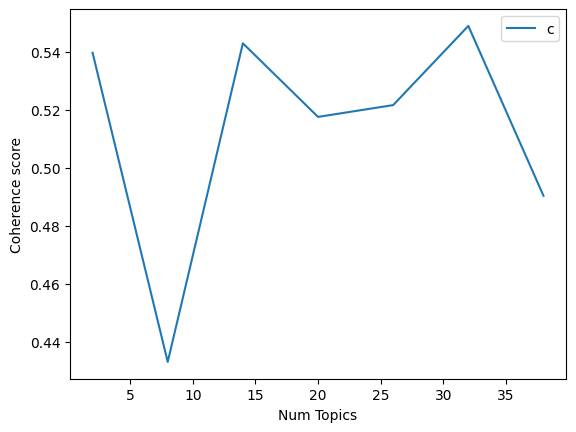

In [24]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

## Running LDA using TF-IDF

In [25]:
lda_model_tfidf = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=100
    ,
    id2word=dictionary,
    passes=50,  # Nilai yang ditingkatkan
    workers=4
)

In [26]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.206*"israel" + 0.102*"kejuaraan" + 0.066*"atlet" + 0.050*"keputusan" + 0.039*"tuan" + 0.037*"event" + 0.033*"federasi" + 0.027*"peserta" + 0.021*"ketua" + 0.020*"world"


Topic: 1 Word: 0.091*"full" + 0.089*"ribu" + 0.071*"kelas" + 0.071*"thailand" + 0.045*"perak" + 0.036*"seharusnya" + 0.033*"peringkat" + 0.030*"catatan" + 0.030*"peraih" + 0.027*"tujuh"


Topic: 2 Word: 0.142*"pelanggan" + 0.087*"merek" + 0.046*"market" + 0.001*"ketahanan" + 0.001*"penumpang" + 0.001*"efisiensi" + 0.001*"berhenti" + 0.001*"produk" + 0.001*"menjual" + 0.001*"penggunaan"


Topic: 3 Word: 0.037*"ekonomi" + 0.028*"daerah" + 0.025*"pembangunan" + 0.024*"sektor" + 0.023*"data" + 0.022*"kebijakan" + 0.021*"industri" + 0.021*"energi" + 0.019*"berkelanjutan" + 0.018*"program"


Topic: 4 Word: 0.001*"membutuhkan" + 0.001*"kecewa" + 0.001*"perusahaan" + 0.001*"pemerintahan" + 0.001*"kepemilikan" + 0.001*"ribu" + 0.001*"opsi" + 0.001*"teknologi" + 0.001*"kuda" + 0.001*"detail"


Topic: 5 Word: 0.

In [27]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.40387217376981205


## classifying sample document using LDA Bag of Words model

In [28]:
# Asumsikan 'documents' sudah didefinisikan dari sel sebelumnya
document_num = 100

# Pastikan nomor dokumen yang dipilih valid
if 1 <= document_num <= len(documents):
    # Ambil dokumen asli (sebagai string)
    doc_sample_string = documents[document_num - 1]

    print("Original document:")
    print(doc_sample_string)

    print("\n\nTokenized and lemmatized document:")
    # Panggil fungsi preprocess dengan string asli
    print(preprocess(doc_sample_string))
else:
    print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

Original document:
Kementerian Transmigrasi (Kementrans) bakal membuka saluran penyampaian aspirasi melalui siaran langsung media sosial selama 24 jam. Hal itu untuk memperingati satu tahun Kabinet Merah Putih yang dipimpin Presiden Prabowo Subianto pada tanggal 21 Oktober 2024. Adapun pembukaan itu akan dilaksanakan dalam Open House Kementerian Transmigrasi tanggal 18-19 Oktober 2025. Menteri dan Wakil Menteri Transmigrasi serta Sekjen dan para Dirjen akan bergantian melayani aspirasi publik ini. "Kami insyaallah akan menyelenggarakan open house 24 jam. Kami membuka ruang online dan offline untuk menerima masukan, kritikan, saran, keluhan, curhat, komplain maupun pandangan-pandangan, atau apapun itu yang terkait dengan transmigrasi. Insyaallah ini akan mulai dibuka hari Sabtu, 18 Oktober pukul 8 pagi, hingga Minggu, 19 Oktober pukul 8 pagi," kata Menteri Transmigrasi M. Iftitah Sulaiman Suryanagara dalam keterangan tertulis, Minggu (12/10/2025). SCROLL TO CONTINUE WITH CONTENT Dalam k

In [29]:
for i in range(len(bow_corpus)):
    print(f"\nDokumen ke-{i+1}:")
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True):
        print("\tSkor: {:.4f}\t Topik: {}".format(score, lda_model.print_topic(index, 5)))


Dokumen ke-1:
	Skor: 0.9821	 Topik: 0.070*"pelaku" + 0.060*"stasiun" + 0.060*"jalur" + 0.055*"perjalanan" + 0.043*"petugas"

Dokumen ke-2:
	Skor: 0.9773	 Topik: 0.083*"siapa" + 0.055*"tahu" + 0.044*"korban" + 0.041*"peristiwa" + 0.041*"desa"

Dokumen ke-3:
	Skor: 0.9853	 Topik: 0.097*"polri" + 0.055*"olahraga" + 0.042*"atlet" + 0.042*"prestasi" + 0.042*"world"

Dokumen ke-4:
	Skor: 0.6103	 Topik: 0.040*"korban" + 0.040*"ditemukan" + 0.025*"tewas" + 0.025*"berinisial" + 0.025*"polisi"
	Skor: 0.2055	 Topik: 0.088*"pramono" + 0.068*"dinas" + 0.039*"taman" + 0.037*"kepala" + 0.030*"bentuk"
	Skor: 0.0708	 Topik: 0.130*"hukum" + 0.072*"kebijakan" + 0.062*"publik" + 0.035*"arah" + 0.031*"ketua"
	Skor: 0.0541	 Topik: 0.112*"sisi" + 0.072*"sumber" + 0.069*"kasus" + 0.066*"titik" + 0.041*"industri"
	Skor: 0.0455	 Topik: 0.091*"kamu" + 0.087*"digunakan" + 0.067*"laman" + 0.066*"pengguna" + 0.046*"pertamina"

Dokumen ke-5:
	Skor: 0.9664	 Topik: 0.069*"program" + 0.051*"perusahaan" + 0.045*"sektor

In [30]:
lda_model[bow_corpus[document_num]]

[(362, 0.9897001)]

In [31]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(362, 0.9897057)]

In [32]:
lda_model.print_topic(index, 581)

'0.076*"madrid" + 0.072*"musim" + 0.050*"klub" + 0.048*"bermain" + 0.024*"memperkuat" + 0.024*"keluar" + 0.024*"situasi" + 0.024*"cedera" + 0.023*"skuad" + 0.023*"januari" + 0.022*"panas" + 0.021*"melawan" + 0.019*"cuma" + 0.019*"menit" + 0.018*"kesempatan" + 0.018*"segera" + 0.018*"bakal" + 0.017*"september" + 0.015*"belanda" + 0.015*"lapangan" + 0.012*"berlanjut" + 0.012*"main" + 0.012*"selalu" + 0.012*"apalagi" + 0.012*"internasional" + 0.012*"tiba" + 0.012*"layak" + 0.012*"membuktikan" + 0.012*"bawah" + 0.012*"demi" + 0.011*"dibawa" + 0.007*"kalah" + 0.006*"empat" + 0.006*"latihan" + 0.006*"alex" + 0.006*"sebanyak" + 0.006*"rekan" + 0.006*"jadwal" + 0.006*"diberi" + 0.006*"membuka" + 0.006*"terlihat" + 0.006*"spanyol" + 0.006*"peluang" + 0.006*"membuatnya" + 0.006*"seorang" + 0.006*"rencana" + 0.006*"publik" + 0.006*"terbang" + 0.006*"menghadapi" + 0.006*"berikutnya" + 0.006*"serupa" + 0.006*"yakin" + 0.006*"ulang" + 0.006*"terbatas" + 0.006*"perhatian" + 0.006*"memanfaatkan" + 0.0

## classifying sample document using LDA TF-IDF model##

In [33]:
# Cek hasil dari model
result = lda_model_tfidf[bow_corpus[document_num]]
print(f"Hasil dari model: {result}")

# Jika hasilnya tidak kosong, jalankan perulangan
if result:
    for index, score in sorted(result, key=lambda tup: tup[1], reverse=True):
        print(f"Skor: {score}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")

Hasil dari model: [(3, 0.4381704), (6, 0.010411086), (12, 0.01031675), (19, 0.035077233), (24, 0.01171054), (39, 0.014232276), (45, 0.01040531), (55, 0.041384865), (62, 0.31261477), (63, 0.011980654), (67, 0.030865915), (71, 0.0111061875), (91, 0.020793788), (98, 0.03206212)]
Skor: 0.4381704032421112	Topik: 0.037*"ekonomi" + 0.028*"daerah" + 0.025*"pembangunan" + 0.024*"sektor" + 0.023*"data"
Skor: 0.312614768743515	Topik: 0.015*"olahraga" + 0.013*"benar" + 0.012*"muhammad" + 0.011*"internasional" + 0.011*"semangat"
Skor: 0.04138486459851265	Topik: 0.062*"unit" + 0.051*"harga" + 0.043*"penjualan" + 0.031*"juta" + 0.026*"september"
Skor: 0.035077232867479324	Topik: 0.045*"juara" + 0.035*"gelar" + 0.033*"wilayah" + 0.032*"tembakan" + 0.028*"final"
Skor: 0.032062120735645294	Topik: 0.124*"bank" + 0.100*"pertamina" + 0.043*"komunitas" + 0.042*"inovasi" + 0.040*"ajang"
Skor: 0.03086591511964798	Topik: 0.033*"bola" + 0.029*"dana" + 0.027*"triliun" + 0.023*"pendidikan" + 0.021*"menerima"
Skor

## Testing model on unseen document

In [34]:
unseen_documents = unseen_documents = [
    "Harga Honda Vario September 2025, Mulai Rp 24 Jutaan" ,
    "Pebalap MotoGP Marc Marquez berhasil menjuarai balapan." ,
    "Apple merilis iPhone baru dengan fitur canggih."
]

# Lakukan perulangan untuk setiap dokumen
for i, unseen_doc in enumerate(unseen_documents):
    # Proses setiap dokumen secara terpisah
    bow_vector = dictionary.doc2bow(preprocess(unseen_doc))

    # Cetak judul atau nomor dokumen untuk kejelasan
    print(f"\n--- Analisis Dokumen ke-{i+1} ({unseen_doc}) ---")

    # Cetak hasil jika ada
    if bow_vector:
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
            print(f"Skor: {score:.4f}\t Topik: {lda_model_tfidf.print_topic(index, 5)}")
    else:
        print("Tidak ada kata yang terdeteksi di dokumen ini.")


--- Analisis Dokumen ke-1 (Harga Honda Vario September 2025, Mulai Rp 24 Jutaan) ---
Skor: 0.4020	 Topik: 0.062*"unit" + 0.051*"harga" + 0.043*"penjualan" + 0.031*"juta" + 0.026*"september"
Skor: 0.2322	 Topik: 0.055*"honda" + 0.027*"momen" + 0.026*"unggahan" + 0.024*"menghasilkan" + 0.024*"lampu"
Skor: 0.1718	 Topik: 0.095*"setahun" + 0.058*"tertinggi" + 0.048*"jutaan" + 0.022*"sedangkan" + 0.017*"november"

--- Analisis Dokumen ke-2 (Pebalap MotoGP Marc Marquez berhasil menjuarai balapan.) ---
Skor: 0.5017	 Topik: 0.105*"motogp" + 0.102*"mandalika" + 0.097*"marquez" + 0.093*"balapan" + 0.047*"acosta"
Skor: 0.1683	 Topik: 0.161*"pebalap" + 0.044*"jajaran" + 0.036*"start" + 0.033*"pembinaan" + 0.024*"berusaha"
Skor: 0.1683	 Topik: 0.090*"marc" + 0.078*"patah" + 0.065*"tulang" + 0.048*"madrid" + 0.044*"buruk"

--- Analisis Dokumen ke-3 (Apple merilis iPhone baru dengan fitur canggih.) ---
Skor: 0.5050	 Topik: 0.058*"etanol" + 0.047*"bakar" + 0.047*"bahan" + 0.037*"mesin" + 0.033*"bensi

## Tugas LDA

In [36]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer
import os

# --- Download NLTK resources ---
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"Gagal mengunduh data NLTK: {e}")

# --- Load CSV ---
file_path = 'hasil_preprocessing_berita.csv'
try:
    data = pd.read_csv(file_path, on_bad_lines='skip')
    documents = data['isi_berita_original'].dropna().tolist()
    print(f"Total {len(documents)} dokumen berhasil dimuat.")
except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []

# --- Bagian 2: Preprocessing Teks ---
if documents:
    # Lemmatizer (untuk bahasa Inggris; di Indonesia bisa skip)
    lemmatizer = WordNetLemmatizer()

    def lemmatize_stemming(text):
        return lemmatizer.lemmatize(text, pos='v')

    # Stopwords Indonesia manual (contoh sederhana)
    stop_words = set([
        'yang','dan','di','ke','dari','untuk','pada','ini','itu','dengan','adalah',
        'atau','oleh','sebagai','akan','pada','tersebut','juga','saat'
    ])

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Buat kamus dan korpus untuk LDA ---
    kamus = Dictionary(data_token)
    kamus.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
    korpus = [kamus.doc2bow(teks) for teks in data_token]

    # --- LDA Model ---
    num_topik = 20
    lda_model = LdaModel(
        korpus,
        num_topics=num_topik,
        id2word=kamus,
        passes=50,
        random_state=100
    )

    # --- Tabel Proporsi Kata dalam Topik ---
    all_topics = lda_model.show_topics(num_topics=num_topik, num_words=20, formatted=False)
    proporsi_kata = []
    for topic_id, word_weights in all_topics:
        for word, weight in word_weights:
            proporsi_kata.append([f"Topik {topic_id}", word, weight])

    df_proporsi_kata = pd.DataFrame(proporsi_kata, columns=['Topik', 'Kata', 'Proporsi'])
    print("\n--- Tabel 1: Proporsi Kata dalam Topik ---")
    display(df_proporsi_kata.head(10))  # tampil di Notebook

    # --- Tabel Proporsi Topik dalam Dokumen ---
    proporsi_topik = []
    for i, doc_bow in enumerate(korpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)
        row_data = {'Dokumen ID': i}
        for topic_id, proporsi in doc_topics:
            row_data[f"Topik {topic_id}"] = proporsi
        proporsi_topik.append(row_data)

    df_proporsi_topik = pd.DataFrame(proporsi_topik).fillna(0)
    cols = ['Dokumen ID'] + [f'Topik {i}' for i in range(num_topik)]
    df_proporsi_topik = df_proporsi_topik[cols]
    print("\n--- Tabel 2: Proporsi Topik dalam Dokumen ---")
    display(df_proporsi_topik.head(10))

    # --- Simpan CSV di folder lokal ---
    csv_file1 = "proporsi_dokumen.csv"
    csv_file2 = "proporsi_kata.csv"
    df_proporsi_topik.to_csv(csv_file1, index=False)
    df_proporsi_kata.to_csv(csv_file2, index=False)

    print(f"\nFile '{csv_file1}' dan '{csv_file2}' berhasil dibuat di folder: {os.getcwd()}")

else:
    print("Tidak dapat melanjutkan karena data dokumen tidak tersedia.")

Total 701 dokumen berhasil dimuat.

--- Tabel 1: Proporsi Kata dalam Topik ---


,Topik,Kata,Proporsi
0,Topik 0,bogor,0.018933
1,Topik 0,merah,0.017126
2,Topik 0,benar,0.016358
3,Topik 0,teman,0.015778
4,Topik 0,dana,0.013110
5,Topik 0,cepat,0.011288
6,Topik 0,prasetyo,0.010903
7,Topik 0,desa,0.010852
8,Topik 0,prabowo,0.010754
9,Topik 0,berhenti,0.010083



--- Tabel 2: Proporsi Topik dalam Dokumen ---


,Dokumen ID,Topik 0,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,...,Topik 10,Topik 11,Topik 12,Topik 13,Topik 14,Topik 15,Topik 16,Topik 17,Topik 18,Topik 19
0,0,0.000413,0.000413,0.000413,0.000413,0.000413,0.000413,0.000413,0.000413,0.000413,...,0.565154,0.000413,0.000413,0.074975,0.000413,0.000413,0.000413,0.000413,0.000413,0.352846
1,1,0.001111,0.001111,0.105694,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,...,0.001111,0.044793,0.040682,0.139038,0.001111,0.001111,0.001111,0.001111,0.001111,0.653125
2,2,0.000725,0.000725,0.000725,0.000725,0.134052,0.000725,0.000725,0.000725,0.207306,...,0.000725,0.000725,0.000725,0.000725,0.412525,0.234521,0.000725,0.000725,0.000725,0.000725
3,3,0.178948,0.000667,0.000667,0.000667,0.070793,0.000667,0.000667,0.000667,0.000667,...,0.208606,0.349488,0.000667,0.182164,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667
4,4,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,...,0.001220,0.001220,0.001220,0.681778,0.001220,0.001220,0.001220,0.001220,0.001220,0.296270
5,5,0.145752,0.001613,0.001613,0.001613,0.001613,0.191953,0.001613,0.043140,0.001613,...,0.001613,0.001613,0.001613,0.001613,0.593346,0.001613,0.001613,0.001613,0.001613,0.001613
6,6,0.001191,0.001191,0.001191,0.001191,0.181462,0.001191,0.001191,0.001191,0.001191,...,0.176794,0.001191,0.001191,0.001191,0.079677,0.001191,0.001191,0.001191,0.001191,0.322453
7,7,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.194659,0.000588,...,0.000588,0.000588,0.000588,0.794751,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588
8,8,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,...,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.001351,0.974323
9,9,0.020233,0.000490,0.000490,0.000490,0.322617,0.000490,0.000490,0.382948,0.058829,...,0.000490,0.000490,0.000490,0.089595,0.118913,0.000490,0.000490,0.000490,0.000490,0.000490



File 'proporsi_dokumen.csv' dan 'proporsi_kata.csv' berhasil dibuat di folder: C:\Users\Raihan Fadillah\Downloads\ppw\ppw


## Klasifikasi

In [37]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ast
import gensim
from gensim.utils import simple_preprocess
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

# --- 1. Memuat dan Menyiapkan Data ---
file_path = 'hasil_preprocessing_berita.csv'   # pastikan file ini sudah diupload di Colab
text_column = 'isi_berita_diproses'               # kolom berisi teks/token
label_column = 'kategori_berita'                # kolom label kategori

try:
    df = pd.read_csv(file_path)
    if text_column not in df.columns or label_column not in df.columns:
        print(f"❌ Error: Kolom '{text_column}' atau '{label_column}' tidak ditemukan.")
        print(f"Kolom tersedia: {list(df.columns)}")
        raise SystemExit
    df = df[[text_column, label_column]].copy()
    print("✅ Data berhasil dimuat.")
except FileNotFoundError:
    raise SystemExit(f"❌ File '{file_path}' tidak ditemukan di direktori kerja.")

# --- 2. Normalisasi Kolom Token ---
def detect_list_format(sample):
    """Deteksi apakah kolom berisi list (misalnya ['kata']) atau teks biasa."""
    if isinstance(sample, str) and sample.strip().startswith('[') and sample.strip().endswith(']'):
        return "list"
    return "text"

if not df[text_column].dropna().empty:
    sample_data = str(df[text_column].dropna().iloc[0])
    data_format = detect_list_format(sample_data)
else:
    data_format = "unknown"

print(f"📄 Format data terdeteksi: {data_format}")

def normalize_tokens(value):
    """Pastikan setiap entri menjadi list token yang valid."""
    if isinstance(value, list):
        return [t for t in value if isinstance(t, str) and t.strip() != ""]
    if isinstance(value, str):
        value = value.strip()
        if value.startswith('[') and value.endswith(']'):
            try:
                parsed = ast.literal_eval(value)
                if isinstance(parsed, list):
                    return [t for t in parsed if isinstance(t, str) and t.strip() != ""]
            except Exception:
                pass
        # Jika string biasa, tokenize dengan gensim
        return simple_preprocess(value)
    return []

# Terapkan normalisasi
df['tokens'] = df[text_column].apply(normalize_tokens)

# Hitung jumlah dokumen kosong & tidak kosong
total_docs = len(df)
nonempty_docs = df['tokens'].apply(len).gt(0).sum()
empty_docs = total_docs - nonempty_docs
print(f"📊 Total dokumen: {total_docs}, Non-kosong: {nonempty_docs}, Kosong: {empty_docs}")

# Hapus baris kosong
df = df[df['tokens'].apply(len) > 0].reset_index(drop=True)
if df.empty:
    raise SystemExit("❌ Tidak ada dokumen berisi token setelah normalisasi. Periksa isi file CSV.")

# --- 3. Membuat Dictionary & Corpus untuk LDA ---
dictionary = gensim.corpora.Dictionary(df['tokens'])
if len(dictionary) == 0:
    raise SystemExit("❌ Dictionary kosong. Tidak ada kata yang bisa dipelajari.")
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
print(f"📘 Jumlah term unik: {len(dictionary)} | Jumlah dokumen: {len(corpus)}")

# --- 4. Pelatihan Model LDA ---
num_topics = min(8, len(df[label_column].unique()))  # jumlah topik disesuaikan jumlah kategori
workers = max(1, min(4, os.cpu_count() or 1))

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=625,
    workers=workers,
    random_state=42
)

print("✅ Model LDA berhasil dilatih.")

# --- 5. Mendapatkan vektor topik untuk setiap dokumen ---
def get_topic_vector(lda_model, bow_vector, num_topics):
    topic_weights = np.zeros(num_topics)
    topic_scores = lda_model.get_document_topics(bow_vector)
    for topic_id, score in topic_scores:
        if 0 <= topic_id < num_topics:
            topic_weights[topic_id] = score
    return topic_weights

X = np.array([get_topic_vector(lda_model, doc, num_topics) for doc in corpus])
y = df[label_column].values

# --- 6. Pelatihan & Evaluasi Logistic Regression ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 7. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n--- 📈 Hasil Klasifikasi ---")
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Laporan Klasifikasi:")
print(report)

# --- 8. Menampilkan Top Kata Tiap Topik ---
print("\n--- 🔍 Top Kata per Topik (Top 10) ---")
for t in range(num_topics):
    print(f"Topik {t}: ", [word for word, prob in lda_model.show_topic(t, topn=10)])

print("\n✅ Proses selesai tanpa error atau warning.")

✅ Data berhasil dimuat.
📄 Format data terdeteksi: text
📊 Total dokumen: 701, Non-kosong: 701, Kosong: 0
📘 Jumlah term unik: 9559 | Jumlah dokumen: 701
✅ Model LDA berhasil dilatih.

--- 📈 Hasil Klasifikasi ---
Akurasi Model: 0.5603

Laporan Klasifikasi:
               precision    recall  f1-score   support

      ekonomi       0.32      0.50      0.39        20
      hiburan       0.55      0.55      0.55        20
        hukum       0.36      0.40      0.38        20
internasional       0.00      0.00      0.00         1
     olahraga       0.75      0.75      0.75        20
     otomotif       0.80      0.60      0.69        20
      politik       0.40      0.20      0.27        20
    sepakbola       0.83      0.95      0.88        20

     accuracy                           0.56       141
    macro avg       0.50      0.49      0.49       141
 weighted avg       0.57      0.56      0.55       141


--- 🔍 Top Kata per Topik (Top 10) ---
Topik 0:  ['up', 'thun', 'debut', 'data', 'i